In [1]:
from sweepcircles import *
from rao import *

In [2]:
# Ruta al archivo
file_path = "../data/Towns_HB_2024-08-14.xlsx"

# Leer todas las hojas como un diccionario {nombre_hoja: DataFrame}
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Filtrar solo las hojas que tienen datos (al menos una fila no vacía)
non_empty_sheets = {name: df for name, df in all_sheets.items() if not df.dropna(how='all').empty}

# Mostrar nombres de hojas con datos
print(f"Hojas con datos: {list(non_empty_sheets.keys())}")

df_towns = non_empty_sheets["Towns"]
df_triple_alliance = non_empty_sheets["Triple Alliance towns"]
df_tenochtitlan = non_empty_sheets["Tenochtitlan"]
df_zempoala = non_empty_sheets["Zempoala"]
df_79 = non_empty_sheets["79 Destinations"]
df_tecpilpan = non_empty_sheets["Tecpilpan"]

coords = df_towns[["Longitude", "Latitude"]].values
names = df_towns["Toponym"].values
len(coords)
coords=coords*10000

Hojas con datos: ['Towns', 'Triple Alliance towns', 'Tenochtitlan', 'Zempoala', '79 Destinations', 'Tecpilpan']


No se encontró región con el círculo en 'in' para (x', cy); no se fusiona. -988016.2 190216.88 7731.391417649149 2
No se encontró región con el círculo en 'in' para (x', cy); no se fusiona. -984498.93 197101.87999999998 7731.391417649149 1
No hay vecinos up/down contiguos; no se fusiona.
No se encontró región con el círculo en 'in' para (x', cy); no se fusiona. -988016.2 190216.88 2262.502973103055 2
No se encontró región con el círculo en 'in' para (x', cy); no se fusiona. -987698.11 191286.85 6636.966669593816 2
No se encontró región con el círculo en 'in' para (x', cy); no se fusiona. -984498.93 197101.87999999998 6636.966669593816 1
No hay vecinos up/down contiguos; no se fusiona.
No se encontró región con el círculo en 'in' para (x', cy); no se fusiona. -985704.76 195885.26 4476.152506896939 1
No hay vecinos up/down contiguos; no se fusiona.
No se encontró región con el círculo en 'in' para (x', cy); no se fusiona. -988963.9957999999 192619.58239999998 628.8307955304408 2
No hay v

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


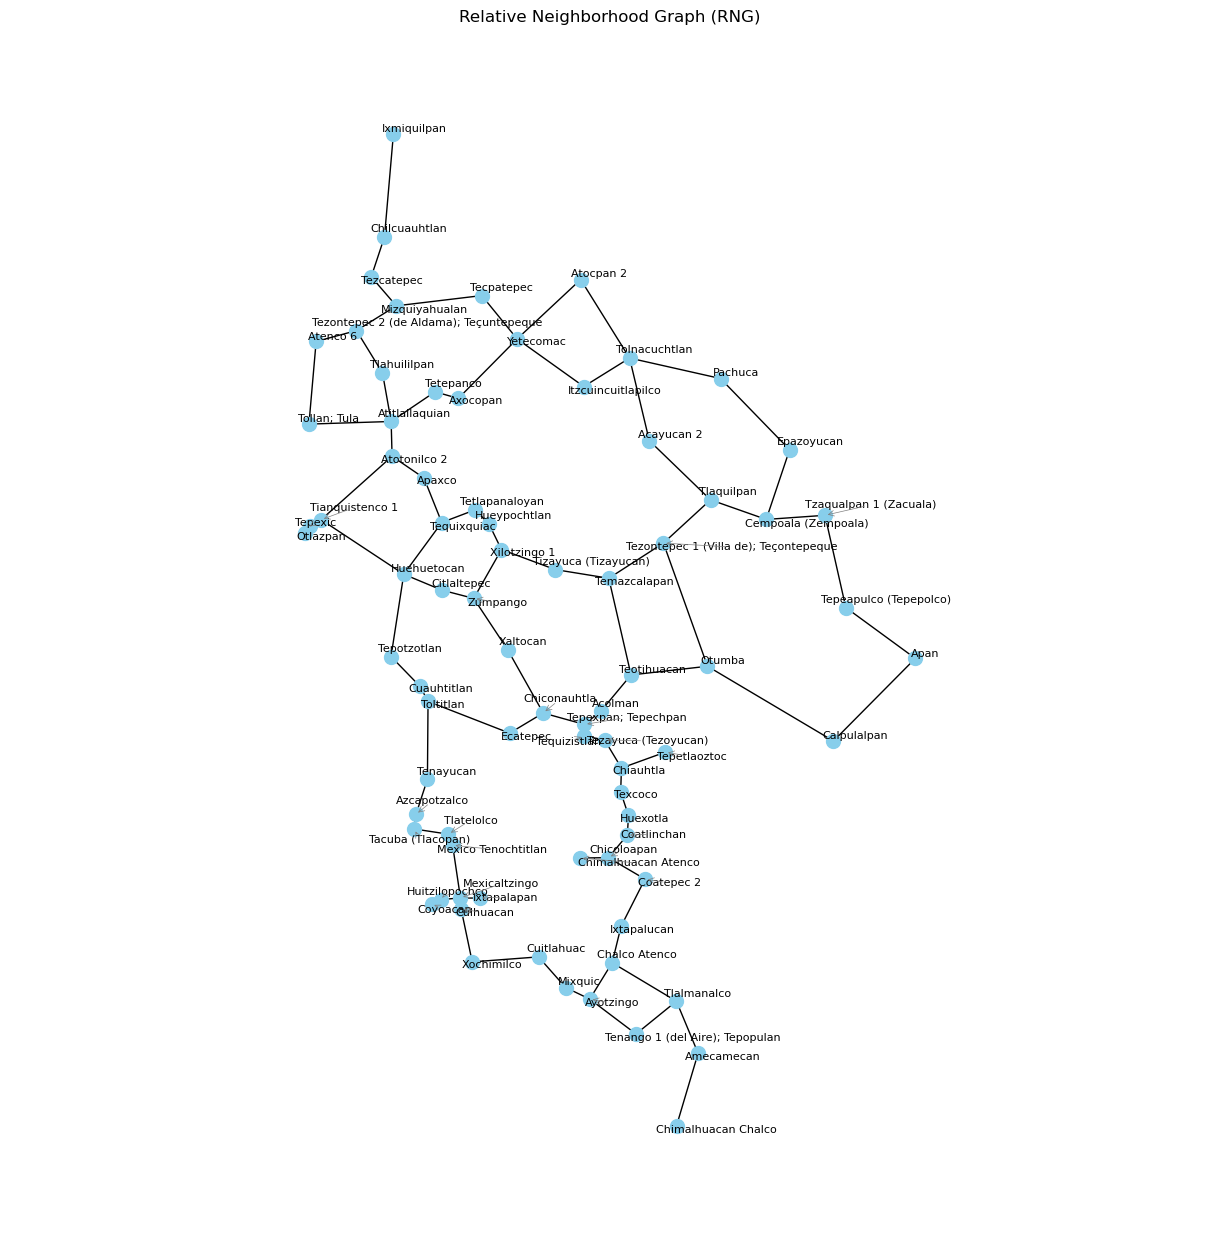

In [3]:
# 1) Keep Delaunay on the ORIGINAL coords (not coords_plot)
edges = compute_delaunay(coords)   # ← was coords_plot

# # 2) Build the graph on the ORIGINAL coords (not coords_plot)
# G0, det0 = build_kbeta_graph_by_sweep(
#     coords,                     # ← was coords_plot
#     edges=edges,
#     beta=2.0,
#     weight=0.0,
#     tolerance=0,
#     points_scope="n_or_j",
#     include_selected_points=False,
#     return_details=True
# )

# Build on the ORIGINAL coords using the auto selector
G0, det0 = build_kbeta_graph_auto(
    coords,             # ORIGINAL coords (n,2)
    edges=edges,        # will be used because beta >= 1.0
    beta=2.0,
    weight=0.0,
    tolerance=0,
    points_scope="n_or_j",
    include_selected_points=False,
    return_details=True
)


# 3) (Optional) Only use coords_plot for plotting aesthetics
plot_rng_graph(coords, names, G0)